In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc6f506ff5dca100aaa4720cae404b2f


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Instead of using two for loops, we can use the enumerate() method as an alternative way to 
# iterate through the list of cities and retrieve both the index, and the city from the list.***
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.***
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | lasa
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | nome
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | oyek
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | toliary
City not found. Skipping...
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | honiara
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | kinsale
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | spokane
Processing Record 19 of Set 1 | severomuysk
Processing Record 20 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 21 of Set 1 | majene
Processing Record 22 of Set 1 | ma

Processing Record 37 of Set 4 | vao
Processing Record 38 of Set 4 | banda aceh
Processing Record 39 of Set 4 | kamenka
Processing Record 40 of Set 4 | kavant
City not found. Skipping...
Processing Record 41 of Set 4 | praya
Processing Record 42 of Set 4 | dunmore town
Processing Record 43 of Set 4 | jiuquan
Processing Record 44 of Set 4 | syedove
Processing Record 45 of Set 4 | pirae
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | tual
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | abu kamal
Processing Record 6 of Set 5 | baie-comeau
Processing Record 7 of Set 5 | pousat
City not found. Skipp

Processing Record 26 of Set 8 | sisimiut
Processing Record 27 of Set 8 | bo
City not found. Skipping...
Processing Record 28 of Set 8 | suhut
Processing Record 29 of Set 8 | iqaluit
Processing Record 30 of Set 8 | pierre
Processing Record 31 of Set 8 | lorengau
Processing Record 32 of Set 8 | abu dhabi
Processing Record 33 of Set 8 | sangar
Processing Record 34 of Set 8 | chuy
Processing Record 35 of Set 8 | grande prairie
Processing Record 36 of Set 8 | skreia
Processing Record 37 of Set 8 | bargal
City not found. Skipping...
Processing Record 38 of Set 8 | bedesa
Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | vikulovo
Processing Record 41 of Set 8 | lucea
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | wadi musa
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | poya
Processing Record 46 of Set 8 | moussoro
Processing Record 47 of Set 8 | luderitz
Processing Record 48 of Set 8 | pangody
Processing Record 49 of Set 

Processing Record 18 of Set 12 | starobaltachevo
Processing Record 19 of Set 12 | san blas
Processing Record 20 of Set 12 | westport
Processing Record 21 of Set 12 | romita
Processing Record 22 of Set 12 | birao
Processing Record 23 of Set 12 | kirkwood
Processing Record 24 of Set 12 | mahibadhoo
Processing Record 25 of Set 12 | baraolt
Processing Record 26 of Set 12 | bemidji
Processing Record 27 of Set 12 | nizwa
Processing Record 28 of Set 12 | slave lake
Processing Record 29 of Set 12 | ellensburg
Processing Record 30 of Set 12 | kirakira
Processing Record 31 of Set 12 | pauini
Processing Record 32 of Set 12 | colesberg
Processing Record 33 of Set 12 | khani
Processing Record 34 of Set 12 | vanavara
Processing Record 35 of Set 12 | perth
Processing Record 36 of Set 12 | sovetskaya gavan
Processing Record 37 of Set 12 | norwich
Processing Record 38 of Set 12 | ekhabi
Processing Record 39 of Set 12 | miraflores
Processing Record 40 of Set 12 | klaksvik
Processing Record 41 of Set 12 

In [10]:
len(city_data)

570

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,26.60,93,90,12.66,CA,2021-01-14 23:13:44
1,Qaanaaq,77.4840,-69.3632,7.41,76,77,4.16,GL,2021-01-14 23:13:44
2,Lasa,46.6166,10.7002,35.01,93,90,4.61,IT,2021-01-14 23:13:44
3,Port Elizabeth,-33.9180,25.5701,68.00,100,90,8.05,ZA,2021-01-14 23:12:12
4,Nome,64.5011,-165.4064,15.80,79,90,3.49,US,2021-01-14 23:13:44
5,Lagoa,39.0500,-27.9833,61.95,89,93,22.82,PT,2021-01-14 23:13:45
6,Oyek,52.5861,104.4556,-11.20,77,0,4.47,RU,2021-01-14 23:13:45
7,Puerto Ayora,-0.7393,-90.3518,82.40,65,75,5.75,EC,2021-01-14 23:11:33
8,Cape Town,-33.9258,18.4232,68.00,82,75,12.66,ZA,2021-01-14 23:13:45
9,Saint-Philippe,-21.3585,55.7679,78.80,78,40,8.81,RE,2021-01-14 23:13:45


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-01-14 23:13:44,55.7435,-97.8558,26.60,93,90,12.66
1,Qaanaaq,GL,2021-01-14 23:13:44,77.4840,-69.3632,7.41,76,77,4.16
2,Lasa,IT,2021-01-14 23:13:44,46.6166,10.7002,35.01,93,90,4.61
3,Port Elizabeth,ZA,2021-01-14 23:12:12,-33.9180,25.5701,68.00,100,90,8.05
4,Nome,US,2021-01-14 23:13:44,64.5011,-165.4064,15.80,79,90,3.49
...,...,...,...,...,...,...,...,...,...
565,Isangel,VU,2021-01-14 23:14:18,-19.5500,169.2667,77.00,94,90,5.75
566,Puksoozero,RU,2021-01-14 23:14:18,62.5903,40.6066,-13.76,89,100,5.03
567,Valdivia,CL,2021-01-14 23:14:19,-39.8142,-73.2459,62.60,59,75,5.75
568,Port Lincoln,AU,2021-01-14 23:14:19,-34.7333,135.8667,59.95,58,52,19.57


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

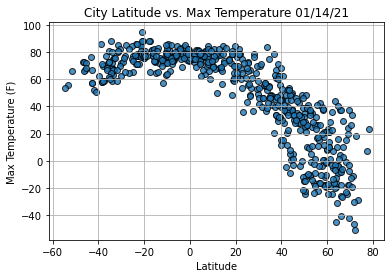

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

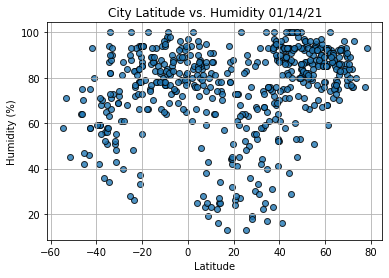

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

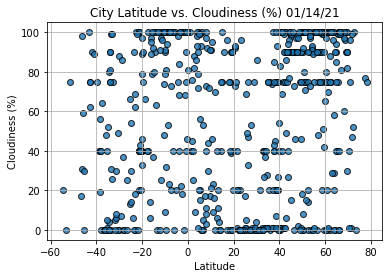

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

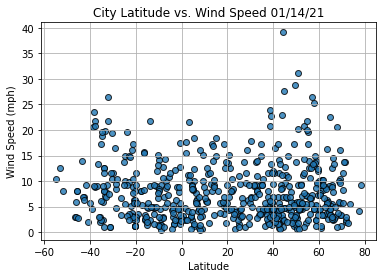

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                      Kinsale
Country                        IE
Date          2021-01-14 23:13:45
Lat                       51.7075
Lng                       -8.5306
Max Temp                       41
Humidity                       87
Cloudiness                     75
Wind Speed                   4.61
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
565    False
566     True
567    False
568    False
569     True
Name: Lat, Length: 570, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-01-14 23:13:44,55.7435,-97.8558,26.60,93,90,12.66
1,Qaanaaq,GL,2021-01-14 23:13:44,77.4840,-69.3632,7.41,76,77,4.16
2,Lasa,IT,2021-01-14 23:13:44,46.6166,10.7002,35.01,93,90,4.61
4,Nome,US,2021-01-14 23:13:44,64.5011,-165.4064,15.80,79,90,3.49
5,Lagoa,PT,2021-01-14 23:13:45,39.0500,-27.9833,61.95,89,93,22.82


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

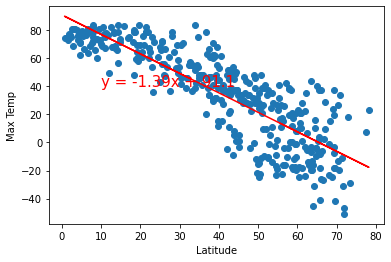

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

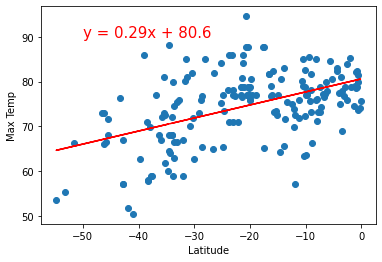

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

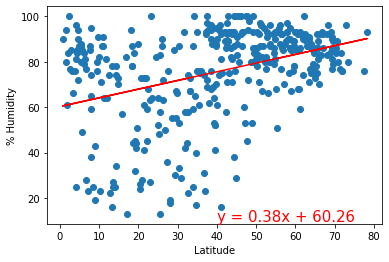

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

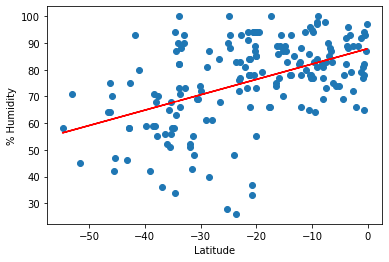

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

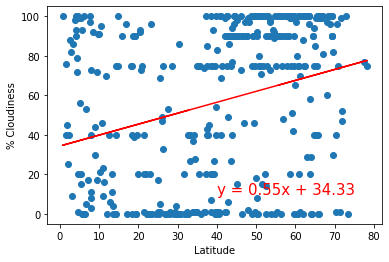

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

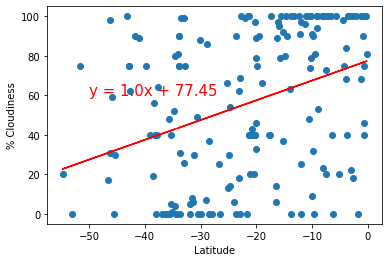

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

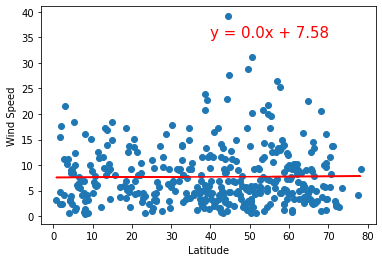

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

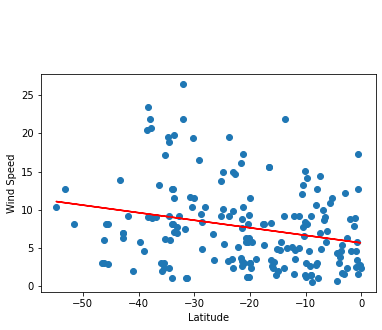

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))